In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
def withStar(string):
  if string=='':
    return '';
  else:
    return '**'+string[:]+'**'

In [3]:
def grams(string,num)->list[str]:
    string=withStar(string)
    begin=len(string)-num;
    token=[];
    for i in range(begin+1):
        a=[];
        a=string[i:i+3]
        token.append(a);
    return token;

In [4]:
def overlap(string1,string2)->int:
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    m=min(len(s1),len(s2));
    if m==0: 
        return 0;
    else:
        sim1=lc/m;
        return sim1;

In [5]:
def jaccard(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    union_elements=list(set(s1).union(set(s2)));
    lu=len(union_elements);
    if lu==0:
        return 0;
    else:
        sim2 = lc/lu;
        return sim2;

In [6]:
def dice(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    if len(s1)+len(s2)==0:
        return 0;
    else:
        sim3=2*lc/(len(s1)+len(s2));
        return sim3;

In [7]:
amazon_train = pd.read_csv("amazonGoogle_train.tsv", sep="\t")
amazon_train

idx                                          text_left  \
0        0  microsoft visio standard 2007 version upgrade ...   
1        1   microsoft mappoint 2006 with gps microsoft 349.0   
2        2   adobe after effects professional 7.0 adobe 999.0   
3        3  motu digital performer 5 digital audio softwar...   
4        4  illustrator cs3 13 mac ed 1u adobe-education-b...   
...    ...                                                ...   
6869  6869  microsoft visual studio team suite 2005 with m...   
6870  6870  microsoft word 2004 upgrade ( mac ) microsoft ...   
6871  6871   adobe after effects professional 7.0 adobe 999.0   
6872  6872           system care professional avanquest 49.95   
6873  6873    punch ! super home suite punch ! software 49.99   

                                             text_right  label  
0              adobe cs3 design standard upgrade 413.99      0  
1     microsoft student with encarta premium 2008 co...      0  
2            adobe flash cs3 professional ( mac ) 699.0      0  
3     motu digital performer dp5 software music prod...      1  
4     adobe illustrator cs3 for mac academic adobe-e...      1  
...                                                 ...    ...  
6869  f1q-00302 microsoft visual studio 2005 profess...      0  
6870      microsoft b21-00806 ae mappoint 2006 cd 50.39      0  
6871  15510669dm adobe after effects cs3 professiona...      0  
6872  microsoft office and windows training professi...      0  
6873  punch software 14100 punch ! professional home...      0  

[6874 rows x 4 columns]

In [8]:
question1=amazon_train['text_left']
question2=amazon_train['text_right']
mark=amazon_train['label']

In [9]:
# #data processing
# question1_token=[]
# question2_token=[]
# for i in range(len(question1)):
#     question1_token.append(grams(question1[i],3))
# for i in range(len(question2)):
#     question2_token.append(grams(question2[i],3))
question1

0       microsoft visio standard 2007 version upgrade ...
1        microsoft mappoint 2006 with gps microsoft 349.0
2        adobe after effects professional 7.0 adobe 999.0
3       motu digital performer 5 digital audio softwar...
4       illustrator cs3 13 mac ed 1u adobe-education-b...
                              ...                        
6869    microsoft visual studio team suite 2005 with m...
6870    microsoft word 2004 upgrade ( mac ) microsoft ...
6871     adobe after effects professional 7.0 adobe 999.0
6872             system care professional avanquest 49.95
6873      punch ! super home suite punch ! software 49.99
Name: text_left, Length: 6874, dtype: object

In [10]:
question2

0                adobe cs3 design standard upgrade 413.99
1       microsoft student with encarta premium 2008 co...
2              adobe flash cs3 professional ( mac ) 699.0
3       motu digital performer dp5 software music prod...
4       adobe illustrator cs3 for mac academic adobe-e...
                              ...                        
6869    f1q-00302 microsoft visual studio 2005 profess...
6870        microsoft b21-00806 ae mappoint 2006 cd 50.39
6871    15510669dm adobe after effects cs3 professiona...
6872    microsoft office and windows training professi...
6873    punch software 14100 punch ! professional home...
Name: text_right, Length: 6874, dtype: object

In [11]:
#calculate the overlap coefficient
overlap_coefficient=[]
for i in range(len(question1)):
    overlap_coefficient.append(overlap(question1[i],question2[i]))

In [12]:
#get the equal coefficient
equal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==1:
        equal_overlap.append(overlap_coefficient[i])
        print("The two sentence is equal, overlap coefficient is:",overlap_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is equal, overlap coefficient is: 0.44285714285714284
motu digital performer 5 digital audio software competitive upgrade ( mac only ) motu 395.0
motu digital performer dp5 software music production software 319.95
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7142857142857143
illustrator cs3 13 mac ed 1u adobe-education-box 199.0
adobe illustrator cs3 for mac academic adobe-education-box 199.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7906976744186046
microsoft word 2007 version upgrade microsoft 109.95
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.782608695652174
hoyle : classic collection 2006 encore 19.99
encore software 11052 hoyle : classic collection 2006 win 98 me 2000 xp 18.97
--------------------------------------------------
The two sentence

--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.9310344827586207
jumpstart reading with karaoke knowledge adventure 29.99
knowledge adventure 20033 jumpstart reading with karaoke knowledge adventure 19.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5135135135135135
galaxy of games 5000 2k games 19.99
egames . inc galaxy of games 5000 pack 16.62
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.48
microsoft windows small business server cal 2003 license pack 20 client addpack device microsoft software
windows sbs cal 2003 20-clt addpak device cal microsoft t74-00003 1413.42
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7068965517241379
stuffit deluxe v 10.0 ( mac ) smith-micro-software 79.99
allume stuffit deluxe 10.0 os x 10.4 or higher smith-micro-software 69.9

microsoft office frontpage 2003 academic version windows ) microsoft 159.98
microsoft 392-02322 ae frontpage 2003 87.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.6538461538461539
power production storyboard quick power production
power production storyboard quick 5 software for mac and windows animation software 299.0
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7555555555555555
perfect attorney premium cosmi corporation 39.99
perfect attorney premium ( pc ) cosmi 29.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7619047619047619
punch ! master landscape & home design punch ! software 59.99
punch software 26100 punch ! master landscape & home design architectural 1 user ( s ) pc 45.97
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.48484848484848486
cry

In [13]:
#get the equal coefficient
inequal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==0:
        inequal_overlap.append(overlap_coefficient[i])
        print("The two sentence is not equal, overlap coefficient is:",overlap_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is not equal, overlap coefficient is: 0.35714285714285715
microsoft visio standard 2007 version upgrade microsoft 129.95
adobe cs3 design standard upgrade 413.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34
microsoft mappoint 2006 with gps microsoft 349.0
microsoft student with encarta premium 2008 complete package 43.6
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
adobe after effects professional 7.0 adobe 999.0
adobe flash cs3 professional ( mac ) 699.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.52
quickbooks premier non-profit edition 2005 intuit inc. 499.95
quickbooks ( r ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38596491228070173
mavis beacon typing 17 ( win/mac ) encore software 19.99
broderbund ma

29300183dm adobe creative suite 3 design standard media tlp tlp nonprofit download - 20.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.7586206896551724
instant immersion german deluxe 2.0 topics entertainment 39.99
instant immersion italian 2.0 topics entertainment 20.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.25
adobe premiere pro cs3 upgrade adobe 299.0
onone software qx-tools pro 7 upgrade 69.17
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4262295081967213
apple final cut express hd 3.5 ( mac ) apple computer 299.0
ma265zm/a final cut express hd v. 3.5 media volume dvd mac multi-country 12.98
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6438356164383562
century software tinyterm plus v. 4.0 complete product century software
centu

The two sentence is not equal, overlap coefficient is: 0.5957446808510638
resumemaker professional 12.0 individual software 29.99
resumemaker ( r ) professional ultimate 39.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4146341463414634
adobe creative suite cs3 master collection upgrade [ mac ] adobe 1399.0
adobe cs3 design premium upgrade 619.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34
zero-g pro pack for garageband ( appleloops ) zero-g 169.95
apple garageband jam pack : rhythm section 95.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4383561643835616
century software tinyterm plus v. 4.0 complete product century software
laplink software pafglle104000p0rtpen laplink everywhere v. 4.0 retail edition remote management complete product remote management complete product pc 39.97
------------

apple final cut studio 2 upgrade from final cut studio ( mac ) apple 499.0
apple software m9372z/a final cut express 2.0 upgrade apple software 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5932203389830508
instant immersion italian platinum topics entertainment 129.99
topics entertainment instant immersion german audio 12.05
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3333333333333333
iris readiris pro 11.0 ( mac ) i.r.i.s. 129.95
iris inc readiris pro 11 corporate edition 430.58
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
microsoft office 2004 standard ( mac ) microsoft 399.99
microsoft ( r ) access 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3466666666666667
3d home architect landscape v. 8 by encore software enco

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3333333333333333
microsoft excel 2004 ( mac ) microsoft 229.99
microsoft 392-02322 ae frontpage 2003 87.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34615384615384615
microsoft office student and teacher edition 2004 macintosh microsoft 149.99
269-10040 microsoft office professional edition 2003 service pack v. 2 media vol 23.53
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3088235294117647
microsoft office small business 2007 full version microsoft 449.95
microsoft office onenote 2007 complete package 1 pc cd win english 78.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4057971014492754
m-audio pro tools m-powered 7.3 m-audio compatible world-class production software m-audio 299.99
steinbe

The two sentence is not equal, overlap coefficient is: 0.4166666666666667
microsoft visio standard 2007 version upgrade microsoft 129.95
microsoft ( r ) access 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5116279069767442
microsoft windows vista home basic upgrade [ dvd ] microsoft 99.95
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2833333333333333
apple final cut express hd 3.5 ( mac ) apple computer 299.0
apple final cut studio 2 upgrade from final cut pro 699.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.31746031746031744
adobe creative suite cs3 design standard [ mac ] adobe 1199.0
adobe production premium cs3 software suite for mac av production software 1698.95
--------------------------------------------------
The two sentence is not equa

microsoft virtual pc for mac 7.0 with windows 2000 microsoft 249.99
microsoft ( r ) windows ( r ) xp professional edition with sp2 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3064516129032258
adobe creative suite cs3 design premium [ mac ] adobe 1799.0
adobe production studio premium software suite video software bundles 1698.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29545454545454547
adobe premiere pro cs3 upgrade adobe 299.0
adobe cs3 flash professional academic 239.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3
microspot interiors ( mac ) microspot ltd. 99.95
microsoft office 2004 for students and teachers ( mac ) 134.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5609756097560976
adobe creative suite cs3 design stand

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4
airline tycoon deluxe topware interactive 19.99
mymaillist deluxe 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34615384615384615
apple xsan ( mac ) apple
apple mac os x 10.4.6 tiger 119.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5737704918032787
instant immersion italian deluxe v2 .0 ( large box ) topics entertainment 29.99
topics entertainment instant immersion hawaiian audio 12.05
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29577464788732394
digidesign music production toolkit ( pro tools le ) digidesign 495.0
bias deck 3.5 le digital audio recording software music production software 69.95
--------------------------------------------------
The two sentence is not equal, overlap

The two sentence is not equal, overlap coefficient is: 0.32
global software smart steps 1st grade windows macintosh ) global software
phase one capture-one pro dslr raw image editing software for macintosh & windows . 399.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
printmaster platinum v 17.0 encore software 39.99
punch software pro platinum v 12.0 87.61
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4142857142857143
punch ! master landscape professional & home design v 10.0 punch ! software 69.95
punch software 20100 punch ! 5 in 1 home design punch software 35.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3387096774193548
microsoft virtual pc for mac 7.0 with windows 2000 microsoft 249.99
microsoft ( r ) office word 2004 for mac full version 231.29
--------------------------------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.53125
quickbooks premier manufacturer and wholesale edition 2007 intuit 399.95
quickbooks pro 2007 win 192.26
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4444444444444444
webroot spy sweeper with antivirus family edition 3 pcs webroot software 49.95
webroot ( r ) spy sweeper ( tm ) 2006 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6097560975609756
adobe creative suite cs3 production premium upsell adobe 1199.0
adobe cs3 design premium upsell 1639.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5588235294117647
phase one capture one le phase one
phase one capture one pro 415.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4444

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5142857142857142
microsoft word 2004 ( mac ) microsoft 229.99
microsoft ( r ) excel 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.47619047619047616
reader rabbit learning system 1st grade encore software 29.99
encore software 13881 tlc dr seuss reading learning system 2008 17.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4857142857142857
adobe creative suite cs3 design premium upsell [ mac ] adobe 1599.0
adobe indesign cs3 for mac 725.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5087719298245614
punch ! professional home design punch ! software 89.99
punch software 90500 home design studio mac punch software 135.99
--------------------------------------------------
The two sente

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.30303030303030304
quicken 2007 basic intuit 29.95
quickbooks ( r ) pro 2007 179.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4897959183673469
history ( dvd ) ( pc & mac ) fogware publishing
high school world history ( pc/mac ) fogware 9.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5423728813559322
elementary success deluxe 2006 ( dw dvd ) topics entertainment 49.99
middle school success deluxe 2008 ( pc/mac ) topics 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4444444444444444
turbocad mac 3d for mac imsi 249.99
sims 2 pets for mac 34.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6060606060606061
the print shop 22 pro 

The two sentence is not equal, overlap coefficient is: 0.391304347826087
microsoft word 2004 ( mac ) microsoft 229.99
microsoft office 2004 software suite oem mac apple & mac software 239.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5789473684210527
punch ! professional home design punch ! software 89.99
punch software 42100 punch ! home design architectural series 18 ( small box ) punch software 119.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38461538461538464
instant immersion italian v2 .0 ( large box ) topics entertainment 29.99
instant immers japanese dlx 2 . 36.11
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.358974358974359
microsoft powerpoint 2004 ( mac ) microsoft 229.99
microsoft ( r ) frontpage 2002 169.56
--------------------------------------------------
The two sentence is not eq

apple final cut express hd 3.5 ( mac ) apple computer 299.0
apple software m9372z/a final cut express 2.0 upgrade apple software 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3225806451612903
crystal reports xi professional edition business objects 495.0
microsoft windows xp professional edition ( upgrade ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.49122807017543857
tlc dr. seuss reading learning system 2008 encore 19.99
encore software 13891 tlc millies math learning system 2008 17.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5263157894736842
instant immersion german audio topics entertainment
instant immers german dlux 2.0 36.11
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3023255813953488
windows xp pro nx7400 o/s hew

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.37735849056603776
adobe indesign cs3 upgrade from pagemaker [ mac ] adobe 199.0
adobe photoshop cs3 extended for mac upgrade 329.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6216216216216216
adobe after effects cs3 adobe 999.0
adobe cs3 after effects upgrade 306.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5666666666666667
dreamweaver cs3 9 mac ed 1u adobe-education-box 199.0
adobe dreamweaver cs3 415.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.8285714285714286
adobe photoshop elements 5.0 / premier elements 3.0 [ lb ] adobe 149.99
adobe premiere elements 3.0 89.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.275
apple log

The two sentence is not equal, overlap coefficient is: 0.6271186440677966
the print shop 22 sb cs by the print shop encore software
encore software 11041 the print shop elements : labels & logos sb cs by the print shop 17.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.52
quickbooks premier nonprofit edition 2007 intuit 399.95
quickbooks ( r ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.7857142857142857
professor teaches excel & word individual software 19.99
professor teaches windows xp individual software 19.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45454545454545453
burning monkey solitaire 4.0 freeverse software 24.95
hoyle solitaire 9.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42857142857142855
axis & allies ( jewe

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5238095238095238
instant immersion spanish ( audio book ) topics entertainment
instant immersion japanese ( audio book ) ( audio book ) 19.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.325
adobe creative suite cs3 web premium [ mac ] adobe 1599.0
adobe premiere pro cs3 academic 339.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
microsoft licenses word mac 10.0 eng govt ( d4800369 ) microsoft licenses 349.83
microsoft word 2004 209.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5483870967741935
adobe creative suite cs3 design premium [ mac ] adobe 1799.0
adobe cs3 web premium 1659.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3958333333333333
acrobat professional 8 ( windows ) adobe 273.0
punch software 14100 punch ! professional home design suite for windows punch software 62.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2777777777777778
adobe premiere pro cs3 adobe 799.0
adobe photoshop cs3 for mac 609.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5531914893617021
f-secure internet security 2007 3 pcs global-marketing-partners 79.99
pc-cillin ( tm ) internet security 2007 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.40540540540540543
adobe creative suite cs3 production premium adobe 1699.0
adobe cs3 master collection 2499.99
--------------------------------------------------
The two sentence is not equal

The two sentence is not equal, overlap coefficient is: 0.45652173913043476
adobe production studio premium adobe 1699.0
cakewalk sonar home studio 6 software music production software 99.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3148148148148148
english literature basics ( win/mac ) ( jewel case ) fogware publishing 9.99
total 3d home deluxe ( jewel case ) ( jce-th6 ) 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23728813559322035
snap ! spelling ( jewel case ) topics entertainment 19.95
cross stitch design studio ( jewel case ) ( 8006 ) m-and-r-technologies 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4339622641509434
instant immersion german audio topics entertainment
instant immersion japanese ( audio book ) ( audio book ) 19.95
--------------------------------------------------
The 

microsoft windows xp professional full version with sp2 microsoft 299.99
adobe photoshop cs3 extended software full version for windows 969.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
quickbooks premier edition 2007 5 user multi-pack intuit 1499.95
quicken ( r ) premier 2007 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4444444444444444
microsoft powerpoint 2004 upgrade ( mac ) microsoft 109.99
microsoft excel 2007 ( pc ) 229.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5172413793103449
adobe creative suite cs3 production premium adobe 1699.0
adobe production studio premium software suite video software bundles 1698.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3333333333333333
instant immersion japanese 2.0 topics entertai

punch software 85100 punch!master landscape pro v10 and home design 59.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
sony sound forge 9 boxed upgrade sony media 232.05
sony media software sound forge 9 digital audio production suite music production software 299.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.44680851063829785
professor teaches excel & word individual software 19.99
professor teaches windows xp home & pro 12.49
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45714285714285713
apple iwork '06 ( mac dvd ) apple 79.0
apple iwork '06 family pack 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2926829268292683
microsoft outlook 2007 microsoft 109.95
microsoft 392-02322 ae frontpage 2003 87.99
------------------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
instant immersion ingles audio deluxe topics entertainment
instant immersion 33 languages 47.36
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6
netgear vpn01l vpn client software netgear 89.99
prosafe vpn client software single user netgear inc. vpn01l 27.78
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.8113207547169812
instant immersion german audio topics entertainment
topics entertainment 40206 instant immersion german lab ( software/audiobook/workbook ) win 98 me 2000 xp/mac os 9 or x 34.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29411764705882354
microsoft windows vista business 32-bit for system builders microsoft 179.99
microsoft winvista bus upsa 1y acq y3 ent w/visent 66j-01685 14

microsoft windows vista ultimate full version [ dvd ] microsoft 399.95
adobe ( r ) photoshop ( r ) cs windows full version 590.92
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45652173913043476
microsoft office mac 2004 english 3pk dsp 731-01163 ) microsoft corporation
microsoft office 2004 student/teacher 145.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.7
scrabble champion edition encore 19.95
encore software 11192 scrabble champion edition win 98 me 2000 xp 18.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.9473684210526315
resumemaker professional 12.0 individual software 29.99
individual software prm-r12 resumemaker professional 12.0 individual software 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36507936507936506
microsoft w

The two sentence is not equal, overlap coefficient is: 0.375
jumpstart kindergarten knowledge adventure 19.99
jumpstart 1st grade ( jc ) 9.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42857142857142855
adobe creative suite cs3 design standard upgrade adobe 399.0
adobe cs3 design premium academic 575.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6101694915254238
adobe creative suite cs3 web premium [ mac ] adobe 1599.0
19700045 adobe creative suite 3 web premium complete package 1 user cd mac univ 1691.87
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45
microsoft office frontpage 2003 academic version windows ) microsoft 159.98
microsoft academic microsoft visio 2003 professional 159.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.392156

The two sentence is not equal, overlap coefficient is: 0.37209302325581395
middle school advantage 2008 encore 39.99
middle school math & science global-software-publishing 12.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6764705882352942
monopoly here & now encore 19.95
encore software 11182 monopoly here & now win 98 me 2000 xp 18.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2564102564102564
adobe photoshop cs3 extended adobe 999.0
adobe premiere pro cs3 upgrade 308.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4411764705882353
microsoft office & windows training professional topics entertainment 49.95
system care ? professional 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4576271186440678
adobe creative suite cs3 web standa

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5789473684210527
family tree maker 2008 platinum encore 99.95
family tree maker premium 11.2 99.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.46551724137931033
adobe creative suite cs3 production premium adobe 1699.0
19300109 adobe creative suite 3 design standard product upgrade package 1 user upgr 424.74
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45714285714285713
adobe premiere pro 2.0 adobe 849.0
adobe premiere elements 3.0 89.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4888888888888889
microsoft windows vista ultimate upgrade [ dvd ] microsoft 259.95
microsoft onenote 2007 upgrade ( pc ) 79.95
--------------------------------------------------
The two sentence is not equal, overlap

microsoft powerpoint 2004 ( mac ) microsoft 229.99
microsoft money 2007 premium ( pc ) 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38461538461538464
microsoft onenote 2007 upgrade microsoft 79.95
microsoft office 2004 standard 369.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5849056603773585
tlc arthur 's kindergarten learning system 2008 encore 19.99
dr. seuss reading learning system 2008 encore 19.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4
steinberg nuendo 3 digital audio software steinberg 2499.0
steinberg cubase studio 4 software music production software 399.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5135135135135135
tlc dr. seuss reading learning system 2008 encore 19.99
student home learning system 109.99
----

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36363636363636365
crystal reports xi professional edition business objects 495.0
orgchart professional 1.3 39.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.532258064516129
jumpstart advanced 2nd grade v2 .0 knowledge adventure 19.99
knowledge adventure inc. jumpstart 4th-6th grade v 2.0 b43 16.93
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2727272727272727
quicken 2007 basic intuit 29.95
quickbooks pro 2007 3 user 409.52
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5245901639344263
instant immersion translator deluxe 2.0 topics entertainment 49.99
topics entertainment instant play guitar deluxe v2 .0 31.06
--------------------------------------------------
The two sentence is not equal, over

zonealarm anti-spyware zone labs 29.99
zonealarm antivirus 2007 ( pc ) zonelabs 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4482758620689655
microsoft publisher 2007 version upgrade microsoft 99.95
microsoft office visio standard 2007 upgrade ( pc ) 129.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42857142857142855
3d home architect home v. 8 by encore software encore software 39.99
encore software 13931 3d home architect landscape design deluxe version 9 25.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.65625
jumpstart world 1st grade knowledge adventure 19.99
jumpstart 1st grade ( jc ) 9.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41975308641975306
the computrace lojack for laptops computer tracking and loss control soluti

adobe pagemaker 7.0 for mac version upgrade 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4411764705882353
microsoft office small business 2007 full version microsoft 449.95
microsoft ( r ) word 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.39473684210526316
simply put software got ta sing windows/macintosh ) simply-put-software
webroot software window washer 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.509090909090909
hoyle puzzle & board games 2007 encore software 19.99
10568 hoyle puzzle & board games 2005 complete package 1 user pc cd win 14.51
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38333333333333336
microsoft office frontpage 2003 academic version windows ) microsoft 159.98
microsoft office visio standard 

The two sentence is not equal, overlap coefficient is: 0.2682926829268293
adobe dreamweaver cs3 upgrade adobe 199.0
adobe cs3 after effects academic 329.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5588235294117647
calendar creator 10 broderbund 29.99
calendar creator deluxe 10 49.87
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42592592592592593
adobe creative suite cs3 production premium upsell adobe 1199.0
production prem cs3 mac upgrad adobe software 805.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5806451612903226
adobe creative suite cs3 design standard upgrade adobe 399.0
29270077 adobe creative suite 3 web standard product upgrade package 1 user upgrade 843.15
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3382352941176471
trea

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4117647058823529
i copy dvd 's 2 me-too-software 49.99
i copy dvds 2 ultra edition 29.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2702702702702703
sony sound forge 9 boxed upgrade sony media 232.05
sonicwall gms 1000 upgrade 63074.12
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32653061224489793
family tree maker 11.2 collector 's edition encore 109.95
abacus aircraft collectors second edition 17.55
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.7894736842105263
punch ! professional home design punch ! software 89.99
punch software 35100 punch ! professional home design suite ( small box ) punch software 62.99
--------------------------------------------------
The two sentence is not equal, ov

microsoft student with encarta premium 2008 dvd microsoft 49.95
microsoft ( r ) office 2004 for mac student and teacher edition 146.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38333333333333336
quickbooks pro 2007 small business financial software intuit 199.95
make finale 2007 software music production software 429.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6
microsoft publisher 2007 version upgrade microsoft 99.95
publisher 2007 upgrade microsoft 164-04052 69.71
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.46987951807228917
onone essentials for adobe photoshop elements version 2 full onone software 59.95
adobe premiere elements 3 and photoshop elements 5 software for windows consumer video editing software 149.95
--------------------------------------------------
The two sentence is not eq

The two sentence is not equal, overlap coefficient is: 0.2830188679245283
home design architect series 3000 v10 .0 punch ! software 149.95
instant architect design suite ( 00ids510cc ) 28.79
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45652173913043476
microsoft office excel 2007 microsoft 229.95
543-03927 microsoft office outlook 2007 media volume cd win english 23.33
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
jumpstart learning games phonics ( pc & mac ) knowledge adventure 9.99
jumpstart 1st grade ( jc ) 9.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.54
vcomm system suite professional 7 avanquest 49.95
avanquest usa llc system care professional 43.32
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27906976744186046
adobe dreamweave

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4772727272727273
microsoft office 2004 professional ( mac ) microsoft 499.99
adobe flash cs3 professional ( mac ) 699.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6470588235294118
adobe creative suite cs3 web standard adobe 999.0
29270077 adobe creative suite 3 web standard product upgrade package 1 user upgrade 843.15
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.7272727272727273
crystal reports 11 reporting essentials trng cbt business objects 199.99
business objects crystal reports xi 459.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5294117647058824
ulead videostudio 10 corel 69.99
video studio 11 plus corel corporation 103.99
--------------------------------------------------
The two se

The two sentence is not equal, overlap coefficient is: 0.4222222222222222
microsoft crm professional cal 3.0 product upgrade license pack user cal microsoft software 9980.0
adobe cs3 flash professional upgrade 205.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.47368421052631576
adobe cs3 design standard macosx dvd adobe 399.0
adobe cs3 web standard upsell 819.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.46153846153846156
adobe premiere elements 3.0 adobe 99.99
adobe premiere pro cs3 upgrade 308.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.275
adobe premiere pro cs3 upgrade adobe 299.0
adobe cs3 web standard academic 389.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41025641025641024
adobe after effects cs3 upgrade adobe 299.0
ado

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38461538461538464
instant immersion italian deluxe v2 .0 ( large box ) topics entertainment 29.99
instant immers japanese dlx 2 . 36.11
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35135135135135137
steinberg sequel ( pc or mac ) music creation & performance software steinberg 129.0
steinberg software halion symphonic orchestra educational edition 545.51
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.43902439024390244
stuffit deluxe 11 aladdin systems 49.99
allume stuffit deluxe 10.0 os x 10.4 or higher smith-micro-software 69.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5396825396825397
3d home architect landscape designer v8 encore software 29.99
punch software 25100 punch ! master landscape

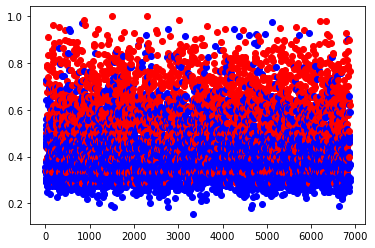

In [14]:
for i in range(len(overlap_coefficient)):
    if overlap_coefficient[i] in equal_overlap:
        plt.scatter(i,overlap_coefficient[i],color='r')
    else:
        plt.scatter(i,overlap_coefficient[i],color='b')
##thershold 0.5

In [15]:
# x=np.linspace(0,1,len(inequal_overlap))
# plt.plot(x,inequal_overlap)

In [16]:
#calculate the jaccard coefficient
jaccard_coefficient=[]
for i in range(len(question1)):
    jaccard_coefficient.append(jaccard(question1[i],question2[i]))

In [17]:
#get the equal coefficient
equal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==1:
        equal_jaccard.append(jaccard_coefficient[i])
        print("The two sentence is equal, overlap coefficient is:",jaccard_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is equal, overlap coefficient is: 0.2719298245614035
motu digital performer 5 digital audio software competitive upgrade ( mac only ) motu 395.0
motu digital performer dp5 software music production software 319.95
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5128205128205128
illustrator cs3 13 mac ed 1u adobe-education-box 199.0
adobe illustrator cs3 for mac academic adobe-education-box 199.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.6181818181818182
microsoft word 2007 version upgrade microsoft 109.95
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.4186046511627907
hoyle : classic collection 2006 encore 19.99
encore software 11052 hoyle : classic collection 2006 win 98 me 2000 xp 18.97
--------------------------------------------------
The two sentence

--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5675675675675675
millie 's math house ages 3-7 ( win/mac ) ibm - ( aap-misc-parts )
millies math house ibm - ( aap-misc-parts ) 9.9
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.46835443037974683
microsoft office student and teacher edition 2004 macintosh microsoft 149.99
microsoft office 2004 student/teacher 145.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.25190839694656486
printmaster 17 platinum by encore software encore software 39.99
encore software 10485 encore printmaster v. 17.0 platinum complete product creativity application 1 user complete product standard pc 33.97
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.36904761904761907
land before time : kindergarten brighter-minds-media-inc . 9.99
the lan

The two sentence is equal, overlap coefficient is: 0.3469387755102041
computrace lojack for laptops 3 year license ( mac ) absolute software 99.95
computrace lojack for laptops 3 yr subscription 89.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.29292929292929293
nero 7 ultra edition enhanced nero inc. 99.99
ahead software 70115 nero 7 ultra edition enhanced mini pc & home entrmnt soln 83.97
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5846153846153846
findex quickverse bible study 2007 bible-suite findex
findex.com inc quickverse bible study 2007 bible suite 24.89
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5727272727272728
sudoku puzzle addict : unlimited edition global-software-publ-na
sudoku puzzle addict : unlimited edition ( win 98 me 2000 xp ) from global software publ na global-software-publ-na 7.93
---

In [18]:
#get the inequal coefficient
inequal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==0:
        inequal_jaccard.append(jaccard_coefficient[i])
        print("The two sentence is not equal, overlap coefficient is:",jaccard_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is not equal, overlap coefficient is: 0.18292682926829268
microsoft visio standard 2007 version upgrade microsoft 129.95
adobe cs3 design standard upgrade 413.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18478260869565216
microsoft mappoint 2006 with gps microsoft 349.0
microsoft student with encarta premium 2008 complete package 43.6
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3235294117647059
adobe after effects professional 7.0 adobe 999.0
adobe flash cs3 professional ( mac ) 699.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1780821917808219
quickbooks premier non-profit edition 2005 intuit inc. 499.95
quickbooks ( r ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24175824175824176
mavis beacon typing 17 ( w

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.14864864864864866
station access collection sony-creative-software 29.99
ultimate puzzle collection 9.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2976190476190476
microsoft powerpoint 2004 upgrade ( mac ) microsoft 109.99
microsoft windows vista home basic upgrade ( pc ) 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22666666666666666
microsoft office 2004 standard ( mac ) microsoft 399.99
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16091954022988506
instant immersion spanish ( audio book ) topics entertainment
instant immers italian dlux 2 . 36.11
--------------------------------------------------
The two sentence is not equal, overlap coeffic

The two sentence is not equal, overlap coefficient is: 0.1504424778761062
ca internet security suite 2007 3 user computer associates 69.95
norton internet security ( v3 .0 ) mac symantec 10069614-in 83.43
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21666666666666667
quickbooks pro 2007 for mac ( mac ) intuit 199.95
quickbooks ( r ) 103.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2956521739130435
instant immersion italian deluxe v2 .0 ( large box ) topics entertainment 29.99
instant immersion italian platinum ( win 95 98 me nt 2000 xp ) 129.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.25
adobe creative suite cs3 production premium upgrade adobe 799.0
adobe cs3 design premium upsell 1639.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is:

The two sentence is not equal, overlap coefficient is: 0.27906976744186046
adobe indesign cs3 upgrade [ mac ] adobe 199.0
adobe creative suite 3 ( cs3 ) design premium upgrade mac 569.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29411764705882354
print shop 22 deluxe encore 49.99
the print shop ( r ) 22 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21
wasp bar code wasp bar code labeler complete package 3 users std cd - wasp technologies
snt-040 ntracker complete package 1 user win 26.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3191489361702128
the print shop 22 deluxe encore 49.99
the printshop 20 19.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24489795918367346
microsoft windows small business server premium 2003 r2 upgrad

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15942028985507245
family tree maker 2008 platinum encore 99.95
sat act & psat 2007 platinum 29.85
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24691358024691357
adobe creative suite cs3 design premium upgrade [ mac ] adobe 599.0
adobe premiere pro cs3 upgrade 308.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18461538461538463
microsoft windows terminal server 2003 client additional license for users - 5 user microsoft 669.0
sr2116010 safenet softremote vpn client license 5 users win 184.57
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21311475409836064
adobe flash pro cs3 upgrade [ mac ] adobe 199.0
adobe premiere pro cs3 825.99
--------------------------------------------------
The two senten

The two sentence is not equal, overlap coefficient is: 0.21348314606741572
adobe photoshop cs3 upgrade [ mac ] adobe 199.0
adobe photoshop elements 4.0 photo-editing software for mac 85.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3058823529411765
sibelius 5 professional edition sibelius-software-ltd . 599.0
i copydvds 2 professional edition me-too-software 27.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1926605504587156
microsoft office mac 2004 english 3pk dsp 731-01163 ) microsoft corporation
microsoft office accounting professional 2007 ( pc ) 229.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22077922077922077
phonics success essentials : grades 7-9 topics education 19.99
phonics success deluxe 2006 22.9
--------------------------------------------------
The two sentence is not equal, over

The two sentence is not equal, overlap coefficient is: 0.2545454545454545
microsoft works suite 2006 microsoft 99.0
microsoft ( r ) word 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19736842105263158
microsoft visio standard 2007 version upgrade microsoft 129.95
microsoft ( r ) access 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2716049382716049
microsoft windows vista home basic upgrade [ dvd ] microsoft 99.95
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18888888888888888
apple final cut express hd 3.5 ( mac ) apple computer 299.0
apple final cut studio 2 upgrade from final cut pro 699.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1941747572815534
adobe creative suite cs

The two sentence is not equal, overlap coefficient is: 0.2391304347826087
microsoft virtual pc for mac 7.0 with windows 2000 microsoft 249.99
microsoft windows vista business full version 249.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1559633027522936
poetry fiction and drama ( win/mac ) ( jewel case ) fogware publishing 9.99
total 3d home deluxe ( jewel case ) ( jce-th6 ) 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.25210084033613445
punch ! professional home design suite punch ! software 69.99
punch software 26100 punch ! master landscape & home design architectural 1 user ( s ) pc 45.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19090909090909092
microsoft visual studio test agent 2005 cd 1 processor license microsoft software 5099.0
microsoft visual basic . net standard 2003 108.95
--

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19047619047619047
adobe photoshop cs3 extended upgrade [ mac ] adobe 349.0
adobe dreamweaver cs3 upgrade windows 236.74
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.248
microsoft windows xp professional full version with sp2 microsoft 299.99
microsoft digital image suite plus full version of photo editing software for windows . 89.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.20714285714285716
microsoft sql server standard edition 2005 64 bit cd/dvd 5 client microsoft 1849.0
microsoft windows server 2003 client additional license for devices 5 pack ( 823930 ) 158.39
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2535211267605634
tonka town ( jewel case ) atari 9.99
total 3d home deluxe ( jewel 

The two sentence is not equal, overlap coefficient is: 0.23076923076923078
microsoft licenses word olp c ( 05903871 ) microsoft licenses 205.73
microsoft word 2004 209.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1893939393939394
wasp bar code wasp bar code labeler complete package 3 users std cd - wasp technologies
eesk1017 emc insignia eroom smb edition v. 7.3 complete package 10 users cd - 950.92
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1623931623931624
the sims 2 : open for business expansion pack aspyr media 34.99
destineer inc age of empires iii : the warchiefs expansion pack 26.14
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19230769230769232
printmaster 17 platinum by encore software encore software 39.99
encore software 13791 super granny 3 17.97
--------------------------------------

The two sentence is not equal, overlap coefficient is: 0.48
microsoft excel 2004 ( mac ) microsoft 229.99
microsoft ( r ) excel 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6
math success deluxe 2006 topics entertainment 49.99
topics entertainment math success deluxe 2008 31.06
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23015873015873015
adobe creative suite cs3 master collection upgrade [ mac ] adobe 1399.0
19500220 adobe creative suite 3 design premium product upgrade package 1 user upgra 1687.48
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.40404040404040403
rainbow fish and the whale ( win/mac ) global-software-publishing 9.99
world of rainbow fish ( a9839m2h ) global-software-publishing 19.19
--------------------------------------------------
The two sentence is not equal, overlap c

microsoft office small business 2007 full version microsoft 449.95
microsoft windows vista business upgrade license 1 pc english 168.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2994011976047904
symantec client security 3.1 with groupware protection business pack 50 user symantec 3732.0
symantec 10517904 client security v. 3.1 business pack complete product internet security 50 user ( s ) complete product standard pc - free shipping 1895.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5679012345679012
microsoft windows xp professional full version with sp2 microsoft 299.99
microsoft ( r ) windows ( r ) xp professional edition with sp2 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4166666666666667
instant immersion italian deluxe v2 .0 ( large box ) topics entertainment 29.99
instant immersio

The two sentence is not equal, overlap coefficient is: 0.3
microsoft powerpoint 2004 ( mac ) microsoft 229.99
microsoft ( r ) excel 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18947368421052632
punch ! master landscape professional & home design v 10.0 punch ! software 69.95
resume maker professional 12 17.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.184
e frontier poser 6 collector 's edition with volume 1 figure pack ( mac ) curious-labs-inc . 279.99
family tree maker 11 collector 's edition 34.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3246753246753247
adobe creative suite cs3 web standard upsell [ mac ] adobe 799.0
adobe cs3 design standard upsell 934.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2168674698795180

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19834710743801653
microsoft windows server 2003 client additional license for users-5 pack microsoft 809.0
microsoft ( r ) windows ( r ) xp professional edition with sp2 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15966386554621848
cinescore professional soundtrack edition sony-pictures-digital-entertainment 249.95
i copydvds 2 professional edition me-too-software 27.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2376237623762376
microsoft sql server developer edition 2005 cd/dvd microsoft software 49.95
microsoft office basic edition 2003 license and media 124.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.20652173913043478
microsoft office small business 2007 full version microsoft 4

The two sentence is not equal, overlap coefficient is: 0.14814814814814814
sibelius 4 professional edition sibelius-software-ltd . 599.99
resume maker professional 12 17.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19852941176470587
microsoft visual studio team edition for software architect 2005 with msdn premium microsoft 5479.0
microsoft ( r ) office 2004 for mac student and teacher edition 146.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24
adobe acrobat capture 3.0 22101258 ) adobe 299.99
adobe acrobat 7.0 standard academic mac 98.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.7
professor teaches windows xp individual software 19.99
individual software prm-wn5 professor teaches windows xp individual software 24.99
--------------------------------------------------
The two sentence is not 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3977272727272727
instant immersion japanese 2.0 topics entertainment 19.99
topics entertainment instant immersion spanish advanced audio 12.05
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19130434782608696
microsoft windows xp home edition full version with sp2 microsoft 199.0
microsoft ( r ) office 2004 for mac standard edition upgrade version 234.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24761904761904763
quickbooks pro 2007 small business financial software intuit 199.95
individual software business planmaker pro 2008 ( pc ) 39.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.17525773195876287
mcafee internet security suite 2007 3 users mcafee 89.99
intego inc internet security barrier 

readiris pro 11 corporate edition ( mac ) iris 499.95
smart-sound sonicfire pro 4 corporate edition mac os x audio software for video 448.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16783216783216784
red hat enterprise linux ws v. 4 update 4 license 1 workstation rl296aa ) hewlett packard
5325302018 snap enterprise data replicator license 1 server linux unix win 663.22
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18867924528301888
adobe creative suite cs3 web standard upsell [ mac ] adobe 799.0
total training for adobe creative suite 3 design premium 279.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2708333333333333
adobe indesign cs3 upgrade [ mac ] adobe 199.0
27510889 adobe indesign cs3 v. 5 product upgrade package 1 user upgrade from 214.55
--------------------------------------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.0784313725490196
photo go sony-media-software 24.95
books to go 19.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38613861386138615
adobe creative suite cs3 production premium adobe 1699.0
19600061dm adobe creative suite 3 production premium media tlp download mac world 20.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18803418803418803
microsoft windows server 2003 client additional license for users-5 pack microsoft 809.0
microsoft office and windows training professional 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27472527472527475
emedia intermediate guitar method win/mac emedia 59.99
emedia rock guitar method ( win 95 98 me nt 2000 xp/mac 8.0 ) 39.15
------------------------------

adobe cs3 web standard 1035.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3142857142857143
punch ! home design architectura series 18 punch ! software 129.99
punch software 14100 punch ! professional home design suite for windows punch software 62.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23622047244094488
3d home architect landscape design deluxe version 9 encore 29.99
punch software 25100 punch ! master landscape & home design architectural 1 user ( s ) pc 45.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.17333333333333334
omnioutliner professional 3.0 csdc 69.95
systemsuite 6 ( tm ) professional mini 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38028169014084506
quickbooks premier nonprofit edition 2007 intuit 399.95
qui

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45348837209302323
adventure workshop 1st-3rd grade 8th edition encore 19.99
encore inc adventure workshop preschool-1st grade 8th edition 17.1
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38181818181818183
ae outlook 2007 win32 microsoft corp
microsoft office outlook 2007 109.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2602739726027397
microsoft onenote 2007 microsoft 99.95
microsoft office visio standard 2007 upgrade ( pc ) 129.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23333333333333334
peachtree by sage complete accounting 2007 sage software 269.99
peachtree ( r ) compatible continuous forms-accounting for windows 8.0-2004 version 199.99
---------------------------------------------

jumpstart 1st grade knowledge adventure
knowledge adventure inc. 20223 jumpstart world 1st grade mini box 16.93
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.48333333333333334
zonealarm wireless security encore software 29.99
zonealarm wireless security 2005 9.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19607843137254902
adobe after effects cs3 adobe 999.0
adobe fireworks cs3 309.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18888888888888888
adobe creative suite cs3 web standard upsell [ mac ] adobe 799.0
adobe acrobat 7.0 standard academic mac 98.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4266666666666667
instant immersion italian deluxe 2.0 topics entertainment 49.99
instant immersion spanish 2.0 topics 19.99
----------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2602739726027397
microsoft excel 2004 ( mac ) microsoft 229.99
microsoft money 2007 home and business ( pc ) 89.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27419354838709675
eovia carrara 5 pro eovia
eovia carrara 4 pro software mac/win animation software 569.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2923076923076923
photo explosion 3.0 nova development 29.99
print explosion deluxe 3.0 : mac 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22580645161290322
microsoft outlook 2007 microsoft 109.95
microsoft ( r ) expression web 1.0 299.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3
logic express 6 apple 299.99
apple log

The two sentence is not equal, overlap coefficient is: 0.24210526315789474
microsoft office 2004 standard upgrade ( mac ) microsoft 239.99
microsoft windows xp professional edition ( upgrade ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18556701030927836
quickbooks premier manufacturer and wholesale edition 2007 intuit 399.95
quickbooks ( r ) simple start 2007 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2543859649122807
adobe creative suite cs3 design standard [ mac ] adobe 1199.0
29270077 adobe creative suite 3 web standard product upgrade package 1 user upgrade 843.15
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23529411764705882
adobe indesign cs3 upgrade [ mac ] adobe 199.0
adobe cs3 after effects upgrade 306.99
--------------------------------------------------
The two sentence is

instant immersion 33 languages topics entertainment 49.99
instant immersion japanese 2.0 22.43
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32857142857142857
punch ! professional home design punch ! software 89.99
punch software punch ! super home suite 49.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21367521367521367
adobe creative suite cs3 web premium [ mac ] adobe 1599.0
29270055 adobe creative suite 3 web standard complete package 1 user cd win uni 1056.98
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24675324675324675
microsoft office 2004 standard upgrade ( mac ) microsoft 239.99
adobe cs3 web standard upgrade 413.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.13253012048192772
cubase se3 educational edition steinberg
i copydvds

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23076923076923078
microsoft visio standard 2007 version upgrade microsoft 129.95
microsoft windows vista home basic upgrade ( pc ) 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1511627906976744
adobe photoshop cs3 [ mac ] adobe 649.0
adobe illustrator cs3 for mac academic adobe-education-box 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22784810126582278
adobe creative suite cs3 web standard upgrade [ mac ] adobe 399.0
adobe cs3 design standard 1243.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24786324786324787
adobe creative suite cs3 design standard [ mac ] adobe 1199.0
29270055 adobe creative suite 3 web standard complete package 1 user cd win uni 1056.98
----------------------

recam remote monitoring software mobi-technologies-inc . 129.0
software 46.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3783783783783784
punch ! master landscape professional & home design v 10.0 punch ! software 69.95
punch software 14100 punch ! professional home design suite for windows punch software 62.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1926605504587156
corel wordperfect office 12 standard upgrade corel 149.99
microsoft ( r ) office 2004 for mac standard edition upgrade version 234.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23333333333333334
adobe premiere pro cs3 adobe 799.0
adobe cs3 production premium academic 569.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29545454545454547
sibelius 4 professional edition

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16875
bitdefender antivirus 10.0 [ 2 year subscription for 2 pcs ] global-marketing-partners 39.95
01-ssc-6997 sonicwall client/server anti-virus suite subscription license 3 years 10 64740.21
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4166666666666667
adobe creative suite cs3 web standard upsell [ mac ] adobe 799.0
adobe creative suite 3 web standard complete package academic cd mac 369.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.43373493975903615
high school advantage 2007 encore software 29.95
encore software 12380 high school advantage 2008 win 2000 xp vista 34.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.8
adobe premiere elements 3.0 adobe 99.99
adobe premiere elements 3.0 89.99
--

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.39344262295081966
hallmark card studio 2005 deluxe sierra home 49.99
hallmark card studio 2006 29.36
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2564102564102564
webroot spy sweeper antispyware 5.x webroot software 29.95
webroot software 54210 desktop firewall webroot software 26.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3508771929824561
microsoft onenote 2007 microsoft 99.95
microsoft ( r ) office ultimate 2007 539.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32558139534883723
microsoft windows vista home basic upgrade [ dvd ] microsoft 99.95
microsoft windows vista business full version 249.95
--------------------------------------------------
The two sentence is not equal, overlap 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1694915254237288
human body 360 megasystems 29.99
topics presents : human body 15.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22826086956521738
microsoft productivity pack for windows mobile microsoft 29.99
microsoft ( r ) windows ( r ) xp home edition with sp2 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23387096774193547
adobe acrobat distiller svr v6-cd sun 100u 42050106 ) adobe 9104.19
42050142 adobe acrobat distiller server v. 6.0 complete package unlimited users 15689.75
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.203125
adobe after effects cs3 upgrade adobe 299.0
adobe cs3 master collection 2499.99
--------------------------------------------------
The two sentence is not equa

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23809523809523808
instant architect design suite imsi design 29.99
instant home design 1 ( jc ) 12.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2152777777777778
microsoft windows server 2003 client additional license for devices 5 pack microsoft 209.0
eu063av aba microsoft windows xp professional license and media 1 user cto english - 137.09
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18292682926829268
microsoft visio standard 2007 version upgrade microsoft 129.95
microsoft ( r ) money 2007 premium 69.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.14492753623188406
funny faces deluxe fogware publishing 19.99
freeverse 3d bridge deluxe 24.99
--------------------------------------------------

The two sentence is not equal, overlap coefficient is: 0.3409090909090909
windows vista business spanish full version [ dvd ] microsoft 329.95
microsoft windows vista business ( pc ) 299.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.26153846153846155
symc backup exec sbs aws 11d win sbs agent for windows systems symantec 447.74
10759458 symantec backup exec 11d for windows small business server premium w / continuo 520.31
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3924050632911392
punch ! 5 in 1 home design punch ! software 39.99
punch software professional home design platinum version 10 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21176470588235294
instant immersion spanish deluxe 2.0 topics entertainment 49.99
photo explosion deluxe ( r ) 2.0 49.99
---------------------------------------

The two sentence is not equal, overlap coefficient is: 0.14864864864864866
sat act and psat 2007 platinum topics entertainment 58.5
ghostsurf 2006 platinum 14.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.375
punch ! home design architectural series 4000 v10 punch ! software 199.99
punch software 20100 punch ! 5 in 1 home design punch software 35.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5797101449275363
punch super home suite 3.0 punch ! software 49.99
punch software 38100 punch ! super home suite ( small box ) punch software 45.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16901408450704225
cinescore professional soundtrack edition sony-pictures-digital-entertainment 249.95
adobe production premium cs3 software suite for windows professional editing software 1698.95
----------------------

The two sentence is not equal, overlap coefficient is: 0.22916666666666666
microsoft crm professional cal 3.0 product upgrade license pack user cal microsoft software 9980.0
eu063av aba microsoft windows xp professional license and media 1 user cto english - 137.09
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1917808219178082
microsoft word 2007 version upgrade microsoft 109.95
word mac 2004 microsoft d48-00487 157.18
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23333333333333334
adobe premiere pro cs3 adobe 799.0
adobe cs3 production premium upsell 1234.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32558139534883723
apple remote desktop 2.2 10 client ( old version ) apple 299.0
apple remote desktop 3 ( 10 managed systems ) 299.99
--------------------------------------------------
The two sentence 

sibelius 5 professional edition sibelius-software-ltd . 599.0
web easy ( r ) professional 6 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1774193548387097
perfect attorney premium cosmi corporation 39.99
mylabels premium 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.17346938775510204
adobe creative suite cs3 design premium [ mac ] adobe 1799.0
adobe indesign cs3 for mac upgrade from pagemaker 205.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27631578947368424
adobe after effects cs3 adobe 999.0
adobe after effects ( v7 .0 ) pro mac up pro-pro adobe 12070227 185.32
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21621621621621623
quickbooks premier nonprofit edition 2007 intuit 399.95
quickbooks ( r ) pro 2003 299.77
-------------

microsoft powerpoint 2004 ( mac ) microsoft 229.99
microsoft onenote 2007 upgrade ( pc ) 79.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
sonicwall global vpn client license 01-ssc-5310 ) sonic systems inc. .
01-ssc-5310 sonicwall global vpn client license 1 user win 43.85
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.17582417582417584
instant immersion japanese ( audio book ) topics entertainment
classics the : the piano ( audio book ) 29.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24528301886792453
adobe premiere elements 3.0 adobe 99.99
adobe premiere elements 3 and photoshop elements 5 software for windows consumer video editing software 149.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3673469387755102
instant immersion japa

The two sentence is not equal, overlap coefficient is: 0.2767857142857143
poetry fiction and drama ( win/mac ) ( jewel case ) fogware publishing 9.99
merriam-webster 's dictionary ( win/mac ) ( jewel case ) ( 10462 ) 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35514018691588783
adobe creative suite cs3 master collection [ mac ] adobe 2499.0
19280016dm adobe creative suite 3 master collection media tlp tlp nonprofit dvd ma 18.88
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24528301886792453
webroot spysweeper antispyware 3 user webroot software 39.99
webroot software inc 66210 spy sweeper ( mass merchant ) ( win 98 me 2000 xp ) 25.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4050632911392405
instant immersion spanish ( audio book ) topics entertainment
instant immersion italian audio ( audio 

aquarium 3 in 1 collection limited edition for win/mac encore software 19.99
aquarium 3-in-one limited edition ( win 95 98 me 2000 xp/mac 10.1 or higher ) 19.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2911392405063291
middle school advantage 2008 encore 39.99
middle school success deluxe 2008 ( pc/mac ) topics 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2236842105263158
adobe photoshop cs3 extended upgrade [ mac ] adobe 349.0
adobe cs3 web standard upgrade 413.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.125
avid liquid vs 7 software avid technology 888.75
software 621.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3372093023255814
mavis beacon teaches typing 17 standard encore software 19.99
broderbund mavis beacon teache

The two sentence is not equal, overlap coefficient is: 0.21818181818181817
3d home architect home v. 8 by encore software encore software 39.99
punch software 42100 punch ! home design architectural series 18 ( small box ) punch software 119.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15384615384615385
microsoft licenses win svr 2003 device cal l/sa ( r1800144 ) microsoft licenses 74.59
microsoft excel 2007 ( pc ) 229.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18181818181818182
adobe audition 2.0 adobe 349.0
adobe cs3 production premium 1749.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27692307692307694
adobe creative suite cs3 production premium adobe 1699.0
adobe cs3 web premium 1659.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2676056338028169
ca brightstor arcserve backup r11 .1 for netware upgrade from arcserve 7 for netware computer associates
babnbr1111s05 brightstor arcserve backup tape library option for netware w/sp1 v. 11.1 - 643.42
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3655913978494624
elementary school advantage 2007 encore software 29.99
encore software 12371 encore middle school advantage 2008 training/wbt pc 33.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15463917525773196
instant immersion american sign language win/mac topics entertainment 9.99
instant immers italian dlux 2 . 36.11
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22666666666666666
pop-up stopper professional panicware 29.99
resum

adobe creative suite cs3 design premium upgrade [ mac ] adobe 599.0
adobe dreamweaver cs3 upgrade 205.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18072289156626506
microsoft windows vista ultimate full version [ dvd ] microsoft 399.95
studio ultimate version 11 129.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18181818181818182
microsoft powerpoint 2004 ( mac ) microsoft 229.99
microspot interiors ( mac 10.2 or later ) 99.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27049180327868855
snap enterprise data replicator advanced license for 10000 series adaptec
5325301871 snap appliance snap care snap enterprise data replicator technical support c 377.06
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2716049382716049
pinnacle mobile medi

world of rainbow fish global-software-publishing 19.99
rainbow fish and the whale 6.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24242424242424243
the computrace lojack for laptops computer tracking and loss control solution by lenovo
lfl-n2-12 computrace lojack for laptops subscription package 1 year 1 notebook m 39.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3625
instant immersion italian deluxe 2.0 topics entertainment 49.99
instant immersion translator deluxe 2.0 22.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16666666666666666
adobe photoshop cs2 fundamental techniques by julieanne kost software cinema
adobe photoshop lightroom 264.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2717391304347826
corel wordperfect office x3 p

software 153.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2765957446808511
microsoft windows vista ultimate upgrade [ dvd ] microsoft 259.95
microsoft windows xp professional edition ( upgrade ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.47058823529411764
microsoft powerpoint 2004 upgrade ( mac ) microsoft 109.99
microsoft ( r ) powerpoint ( r ) 2002 upgrade 108.87
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22321428571428573
m-audio pro tools m-powered 7.3 m-audio compatible world-class production software m-audio 299.99
steinberg nuendo 3 music production software 1999.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.20454545454545456
wasp bar code wasp bar code labeler complete package 3 users std cd - wasp technologies
292

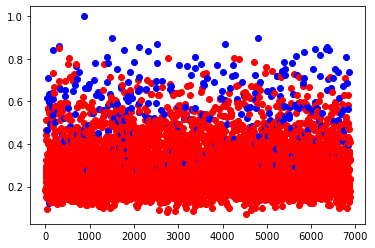

In [19]:
for i in range(len(jaccard_coefficient)):
    if jaccard_coefficient[i] in inequal_jaccard:
        plt.scatter(i,jaccard_coefficient[i],color='r')
    else:
        plt.scatter(i,jaccard_coefficient[i],color='b')
# worse than overlap coeffient

In [20]:
#calculate the dice's coefficient
dice_coefficient=[]
for i in range(len(question1)):
    dice_coefficient.append(dice(question1[i],question2[i]))

In [21]:
#get the equal coefficient
equal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==1:
        equal_dice.append(dice_coefficient[i])
        print("The two sentence is equal, overlap coefficient is:",dice_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is equal, overlap coefficient is: 0.3803680981595092
motu digital performer 5 digital audio software competitive upgrade ( mac only ) motu 395.0
motu digital performer dp5 software music production software 319.95
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.6504065040650406
illustrator cs3 13 mac ed 1u adobe-education-box 199.0
adobe illustrator cs3 for mac academic adobe-education-box 199.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7010309278350515
microsoft word 2007 version upgrade microsoft 109.95
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.576
hoyle : classic collection 2006 encore 19.99
encore software 11052 hoyle : classic collection 2006 win 98 me 2000 xp 18.97
--------------------------------------------------
The two sentence is equal, ov

The two sentence is equal, overlap coefficient is: 0.59375
final cut express 2.0 upgrade apple computer 99.99
apple software m9372z/a final cut express 2.0 upgrade apple software 79.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.3516483516483517
write brothers dramatica pro win/mac write brothers 269.99
dramatica pro 4 for pc 249.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.72
easy video editor 2.0 by honest technology global-marketing-partners 50.88
global marketing partners easy video editor 2.0 honest technology global-marketing-partners 25.21
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5309734513274337
services for netware 5.0 microsoft 149.0
microsoft windows services for netware v. 5.0 complete package 138.17
--------------------------------------------------
The two sentence is equal, overlap coeffic

--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5915492957746479
zonealarm pro firewall zone labs 39.99
zone labs zonealarm pro 30.17
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.6666666666666666
punch ! master landscape & home design punch ! software 99.99
punch software 25100 punch ! master landscape and home design punch software 45.99
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.7272727272727273
starry night galaxy explorer ( pc & mac ) imaginova 9.99
starry night galaxy explorer ( pc & mac ) ( snge-5-c1u ) 9.59
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.8131868131868132
solitaire antics deluxe masque publishing
masque publishing solitaire antics deluxe 8.46
--------------------------------------------------
The two sentence is equal, overlap coeffici

In [22]:
#get the inequal coefficient
inequal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==0:
        inequal_dice.append(dice_coefficient[i])
        print("The two sentence is not equal, overlap coefficient is:",dice_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is not equal, overlap coefficient is: 0.2830188679245283
microsoft visio standard 2007 version upgrade microsoft 129.95
adobe cs3 design standard upgrade 413.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2905982905982906
microsoft mappoint 2006 with gps microsoft 349.0
microsoft student with encarta premium 2008 complete package 43.6
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.46808510638297873
adobe after effects professional 7.0 adobe 999.0
adobe flash cs3 professional ( mac ) 699.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29545454545454547
quickbooks premier non-profit edition 2005 intuit inc. 499.95
quickbooks ( r ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3826086956521739
mavis beacon typing 17 ( wi

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36879432624113473
adobe production studio premium adobe 1699.0
adobe production premium cs3 software suite for windows professional editing software 1698.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34951456310679613
adobe dreamweaver cs3 upgrade adobe 199.0
adobe illustrator cs3 upgrade from freehand for mac 206.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4520547945205479
adobe creative suite cs3 design premium [ mac ] adobe 1799.0
adobe creative suite 3 ( cs3 ) design suite standard upgrade ( upsell ) mac 859.96
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2727272727272727
microsoft data analyzer 2002 microsoft 179.0
microsoft office 2004 std upgrade 219.99
----------------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.48739495798319327
vpn manager five to ten firebox watchguard technologies inc 1995.0
vpn manager 10 fireboxes watchguard wg4010 831.36
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4217687074829932
punch ! professional home design suite punch ! software 69.99
punch software 25100 punch ! master landscape and home design punch software 45.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2634730538922156
hp dss software v. 4.0 complete package t1936aa ua0 ) hewlett-packard - ( consumables ) 630.36
prw photo explosion deluxe v. 3.0 complete package 1 user cd win 47.6
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4421052631578947
instant immersion spanish 2.0 topics entertainment 29.99
instant immers 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4727272727272727
mavis beacon typing 17 ( win/mac ) encore software 19.99
mavis beacon teaches typing v17 deluxe pc/mac 29.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2978723404255319
instant immersion japanese 2.0 topics entertainment 19.99
instant immers french dlx 2 27.57
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3709677419354839
treasure mountain ! ( jewel case ) ages 5-9 for win/mac riverdeep 9.99
geometry ( win/mac ) ( jewel case ) ( 10158 ) 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3225806451612903
microsoft windows small business server premium 2003 r2 upgrade cd/dvd 5 client microsoft 709.0
microsoft ( r ) windows vista ( tm ) home premium 239.99
-------------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3103448275862069
varmint hunter ( jewel case ) encore 9.99
merriam-webster 's dictionary ( win/mac ) ( jewel case ) ( 10462 ) 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3026315789473684
apple final cut studio 2 upgrade from final cut studio ( mac ) apple 499.0
apple software m9372z/a final cut express 2.0 upgrade apple software 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5691056910569106
instant immersion italian platinum topics entertainment 129.99
topics entertainment instant immersion german audio 12.05
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32323232323232326
iris readiris pro 11.0 ( mac ) i.r.i.s. 129.95
iris inc readiris pro 11 corporate edition 430.58
-----------------

quickbooks premier non-profit edition 2005 intuit inc. 499.95
quicken 2007 premier win cd intuit 73.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3764705882352941
adobe audition 2.0 upgrade adobe 129.0
adobe cs3 production premium upgrade 822.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6804123711340206
microsoft word 2004 upgrade ( mac ) microsoft 109.99
microsoft word 2007 upgrade ( pc ) 109.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41025641025641024
family tree maker version 16 collectors edition encore software
encore inc family tree maker v 16 essentials 25.75
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2823529411764706
sharks 2.0 ( pc & mac ) e-b-c-marketing 19.99
apple appleworks 6.2.9 ( mac ) 79.99
--------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3023255813953488
quicken legal business pro 2007 nolo press 79.99
business plan pro ( r ) 2004 99.87
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2987012987012987
adobe creative suite cs3 web premium [ mac ] adobe 1599.0
adobe production premium cs3 software suite for windows professional editing software 1698.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.532258064516129
middle school advantage 2008 encore 39.99
encore software 12371 encore middle school advantage 2008 training/wbt pc 33.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35772357723577236
microsoft mappoint 2006 standard edition microsoft 299.0
microsoft academic microsoft office project 2003 standard 69.95
---------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4117647058823529
reference success deluxe 2006 topics entertainment 49.95
elementary school success deluxe 2006 15.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.48484848484848486
adobe photoshop cs3 [ mac ] adobe 649.0
adobe photoshop cs3 ( v10 .0 ) mac adobe 13102488 537.65
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4105960264900662
punch ! master landscape & home design punch ! software 59.99
punch software 41100 punch ! home design architectural series 18 punch software 118.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24
sibelius 5 professional edition sibelius-software-ltd . 599.0
adobe cs3 flash professional 724.99
--------------------------------------------------
The two sentence i

The two sentence is not equal, overlap coefficient is: 0.449438202247191
kids power fun for little ones topics entertainment 19.99
kids power fun for kids 15.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2564102564102564
norton internet security 2008 10 user symantec 199.99
f-secure internet security 2007 3 pcs ( global marketing partners ) global-marketing-partners 63.35
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3853211009174312
family tree maker 11.2 collector 's edition encore 109.95
encore inc family tree maker 2008 platinum 85.07
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5384615384615384
instant immersion spanish ( audio book ) topics entertainment
topics entertainment instant immersion japanese crash course 6.56
--------------------------------------------------
The two sentence is not e

The two sentence is not equal, overlap coefficient is: 0.32061068702290074
microsoft virtual pc for mac 7.0 with windows 2000 microsoft 249.99
microsoft ( r ) office word 2004 for mac full version 231.29
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3114754098360656
instant immersion italian 2.0 topics entertainment 29.99
instant immersion japanese ( audio book ) ( audio book ) 19.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.30120481927710846
grisoft avg anti-virus & anti-spyware 2 year subscription grisoft 39.95
01-ssc-6991 sonicwall client/server anti-virus suite subscription license 3 years 10 863.87
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5960264900662252
instant immersion german deluxe 2.0 topics entertainment 39.99
topics entertainment instant immersion italian deluxe 2.0 ( mass merchant

microsoft word 2004 ( mac ) microsoft 229.99
microsoft ( r ) office 2004 for mac student and teacher edition 146.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5584415584415584
home design architect series 3000 v10 .0 punch ! software 149.95
punch software 41100 punch ! home design architectural series 18 punch software 118.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2782608695652174
microsoft word 2004 upgrade ( mac ) microsoft 109.99
microsoft office accounting professional 2007 ( pc ) 229.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2222222222222222
aircraft collector 's second edition abacus 19.95
neil diamond the neil diamond collection 22.13
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.296875
adobe after effects 7.0 professi

punch ! master landscape professional & home design v 10.0 punch ! software 69.95
resume maker professional 12 17.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3087248322147651
e frontier poser 6 collector 's edition with volume 1 figure pack ( mac ) curious-labs-inc . 279.99
family tree maker 11 collector 's edition 34.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4672897196261682
adobe creative suite cs3 web standard upsell [ mac ] adobe 799.0
adobe cs3 design standard upsell 934.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.33962264150943394
adobe creative suite cs3 design premium [ mac ] adobe 1799.0
adobe indesign cs3 for mac academic 192.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4409448818897638
adobe photoshop cs2 ( mac 

The two sentence is not equal, overlap coefficient is: 0.3333333333333333
microsoft office excel 2007 microsoft 229.95
microsoft ( r ) office word 2004 for mac full version 231.29
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.37209302325581395
adobe dreamweaver cs3 upgrade adobe 199.0
adobe indesign cs3 for mac upgrade 205.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6075949367088608
computrace lojack for laptops : 1 year subscription absolute software 49.99
absolute software lfl-n2-48 computrace lojack for laptops 4 year license 105.68
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3076923076923077
microsoft mappoint 2006 with gps microsoft 349.0
microsoft word 2004 209.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3270440251572327
mic

adobe creative suite cs3 master collection upsell adobe 1999.0
adobe cs3 design standard upsell 934.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.43373493975903615
phase one capture one pro win/mac phase one 499.0
phase one capture one le 76.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.358974358974359
adobe creative suite cs3 web standard upgrade [ mac ] adobe 399.0
19700045 adobe creative suite 3 web premium complete package 1 user cd mac univ 1691.87
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35294117647058826
microsoft digital image suite plus [ lb ] microsoft software 129.95
microsoft microsoft office pro 2004 software suite mac apple & mac software 498.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3709677419354839
microsoft 

adobe cs3 web premium 1659.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4186046511627907
reel deal casino shuffle master edition phantom efx 19.99
reel deal casino championship edition ( win 98 me nt 2000 xp ) 19.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5
genuine fractals print pro 5 1u onone software 299.95
onone software inc. gfs-50211 genuine fractals 5 full 1u 148.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36129032258064514
steinberg sequel ( pc or mac ) music creation & performance software steinberg 129.0
steinberg cubase studio 4 software music production software 399.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5645161290322581
instant immersion italian deluxe 2.0 topics entertainment 49.99
topics entertainment i

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3111111111111111
microsoft excel 2004 ( mac ) microsoft 229.99
microsoft ( r ) expression web 1.0 299.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.28421052631578947
microsoft licenses win svr 2003 device cal l/sa ( r1800144 ) microsoft licenses 74.59
microsoft windows terminal server 2003 client additional license for users - 5 user ( 824048 ) 719.04
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.37362637362637363
adobe dreamweaver cs3 upgrade [ mac ] adobe 199.0
adobe cs3 after effects upgrade 306.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2857142857142857
onone plug-in suite 3 for adobe photoshop onone software 399.95
adobe photoshop cs3 extended for mac academic 295.99
----------------

The two sentence is not equal, overlap coefficient is: 0.4588235294117647
sibelius 4 educational edition sibelius-software-ltd . 329.0
sibelius sibelius 5 software educational discount music production software sibelius-software-ltd . 248.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2803738317757009
microsoft visio standard 2007 version upgrade microsoft 129.95
microsoft money 2007 premium ( pc ) 79.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3956043956043956
punch ! professional home design punch ! software 89.99
system care ? professional 49.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3783783783783784
adobe photoshop cs2 ( mac ) [ old version ] adobe 649.0
adobe photoshop cs3 extended for mac academic 295.99
--------------------------------------------------
The two sentence is not equal

The two sentence is not equal, overlap coefficient is: 0.3050847457627119
adobe creative suite cs3 master collection upgrade [ mac ] adobe 1399.0
adobe cs3 flash professional upgrade 205.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4397163120567376
intuit quicken home inventory manager windows intuit 34.95
intuit quickbooks customer manager 2.5 for windows tax & finance software 79.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3717948717948718
hp data protector exp bu svr cmp upgrade ltu hewlett packard
bb117ac hp storageworks data protector express backup server product upgrade package - 459.3
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6075949367088608
computrace lojack for laptops : 3 year subscription absolute software 99.99
absolute software lfl-n2-48 computrace lojack for laptops 4 year l

The two sentence is not equal, overlap coefficient is: 0.3181818181818182
learning quickbooks 2007 intuit 39.95
quickbooks ( r ) pro 2007 edition 3-user 499.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36496350364963503
quickbooks pro 2007 small business financial software intuit 199.95
palo alto software business plan pro 2007 palo-alto-software 88.83
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.436241610738255
microsoft visual studio team edition for software developers 2005 with msdn premium microsoft 5479.0
microsoft 121-00324 visual studio team suite 2005 with msdn premium subscriptions complete product software development standard 1 user ( s ) complete product english pc - free shipping 10015.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4583333333333333
instant immersion spanish 2.0 topi

geometry ( win/mac ) ( jewel case ) ( 10158 ) 9.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2857142857142857
microsoft windows xp professional full version with sp2 microsoft 299.99
adobe after effects professional 7 software for windows effects software 999.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3023255813953488
adobe indesign cs3 upgrade [ mac ] adobe 199.0
adobe illustrator cs3 for mac 619.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2994011976047904
steinberg nuendo 3 digital audio software steinberg 2499.0
steinberg wavelab studio 6 audio editing software competitive crossgrade music production software 199.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3466666666666667
quickbooks point-of-sale basic 6.0 intuit 799.95

adobe photoshop cs3 extended adobe 999.0
adobe photoshop elements 4.0 mac academic adobe-education-box 69.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4090909090909091
cubase se3 educational edition steinberg
steinberg cubase studio 4 software educational discount music production software 179.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5625
professional home design suite platinum punch ! software 99.95
punch software 35100 punch ! professional home design suite ( small box ) punch software 62.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29411764705882354
final draft 7 professional scriptwriting win/mac final draft 289.99
final-draft scriptwriter 's suite 2.5 screenwriting software mac/win screen writing software 279.95
--------------------------------------------------
The two sentence is 

quickbooks premier manufacturer and wholesale edition 2007 intuit 399.95
quickbooks ( r ) simple start 2007 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3741935483870968
adobe creative suite cs3 design standard [ mac ] adobe 1199.0
29270077 adobe creative suite 3 web standard product upgrade package 1 user upgrade 843.15
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36363636363636365
adobe indesign cs3 upgrade [ mac ] adobe 199.0
adobe cs3 after effects upgrade 306.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.49523809523809526
adobe creative suite cs3 design standard [ mac ] adobe 1199.0
adobe cs3 design standard upgrade 413.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5393258426966292
elementary school advantage 2007 encore so

microsoft outlook 2007 microsoft 109.95
word mac 2004 microsoft d48-00487 157.18
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2716049382716049
quickbooks credit card processing kit 3.0 intuit 39.95
quickbooks ( r ) 103.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27631578947368424
microsoft office frontpage 2003 academic version windows ) microsoft 159.98
windows sbs cal 2003 20-clt addpak device cal microsoft t74-00003 1413.42
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4473684210526316
quickbooks pro 2007 for mac ( mac ) intuit 199.95
quickbooks ( r ) 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5208333333333334
microsoft windows small business server premium 2003 r2 upgrade cd/dvd 5 client microsoft 709.0
t74-01215 microsoft

The two sentence is not equal, overlap coefficient is: 0.3586206896551724
adobe creative suite cs3 production premium adobe 1699.0
adobe creative suite 3 design standard complete package 1 user academic windows 369.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.37777777777777777
adobe illustrator cs3 upgrade [ mac ] adobe 199.0
adobe premiere pro cs3 upgrade 308.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27184466019417475
instant immersion french deluxe 2.0 topics entertainment 49.99
nova print explosion deluxe 3.0 46.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.368
apple mac os x tiger 10.4.6 family pack ( mac ) apple computer 199.0
apple . mac 4.0 family pack ( new or renewal ) 145.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36764705882352944
library expansion option-upg novastor corporation
12302 novanet library expansion option upgrade license 1 server linux win nw 333.31
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4892086330935252
adobe creative suite cs3 web premium upgrade [ mac ] adobe 499.0
adobe creative suite ( v3 .0 ) design premium mac adobe 19500009 1482.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6861313868613139
tlc arthur 's kindergarten learning system 2008 encore 19.99
encore software 13861 tlc arthurs kindergarten learning system 2008 17.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35514018691588783
acrobat professional 8 mac upsell standard-professional adobe 273.0
adobe cs3 web standard u

emc retrospect 7.5 professional for windows upgrade dantz
emc insignia retrospect server 6.0 for mac upgrade 285.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4144144144144144
corel wordperfect office x3 professional edition corel 399.99
microspot macdraft professional edition 249.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34146341463414637
zonealarm anti-spyware zone labs 29.99
anti-spyware 3.0 win normal 1u new 24.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.25806451612903225
microsoft visio standard 2007 microsoft 259.95
microsoft 392-02322 ae frontpage 2003 87.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4
acrobat professional 8 ( windows ) adobe 273.0
microsoft windows xp professional edition ( upgrade ) 199.99
---------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42391304347826086
adventure workshop 4th-6th grade 7th ed sb cs by riverdeep encore software 19.99
encore software 12411 encore adventure workshop preschool-1st grade 8th edition educational pc 17.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.391304347826087
microsoft powerpoint 2004 ( mac ) microsoft 229.99
microsoft ( r ) works suite 2006 99.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5306122448979592
adventure workshop 1st-3rd grade 8th edition encore 19.99
encore software 10114 adventure workshop 1st-3rd grade 7th ed sb cs by riverdeep 17.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2564102564102564
adobe flash pro cs3 [ mac ] adobe 699.0
premiere pro cs3 mac upgrade 320.25
-------

The two sentence is not equal, overlap coefficient is: 0.3893805309734513
acrobat professional 8 mac upsell standard-professional adobe 273.0
adobe flash cs3 professional ( mac ) 699.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.345679012345679
microsoft windows xp professional upgrade with sp2 microsoft software 199.99
individual software prm-wn5 professor teaches windows xp individual software 24.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2898550724637681
human body 360 megasystems 29.99
topics presents : human body 15.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.33070866141732286
microsoft productivity pack for windows mobile microsoft 29.99
microsoft ( r ) windows ( r ) xp home edition with sp2 199.99
--------------------------------------------------
The two sentence is not equal, overla

The two sentence is not equal, overlap coefficient is: 0.3103448275862069
ca arcserve bkup protection suite exch r11 .5 upgrade prod only computer associates
cadtprnaen150 ca desktop protection suite v. 1.5 complete package 5 users win en 298.13
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24691358024691357
microsoft asp net web matrix microsoft 30.0
microsoft ( r ) access 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5691056910569106
elementary success deluxe 2006 ( dw dvd ) topics entertainment 49.99
topics entertainment math success deluxe 2008 31.06
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41379310344827586
kaplan sat/act/psat platinum 2007 win/mac topics entertainment 49.99
kaplan act/sat/psat gold 2007 mac os x 22.99
--------------------------------------------------
The two sent

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34
microsoft word 2004 upgrade ( mac ) microsoft 109.99
microsoft ( r ) project standard 2007 599.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41420118343195267
adobe after effects professional 6.5 upgrade from standard to professional adobe 499.99
adobe after effects professional 7 software for windows effects software 999.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.30158730158730157
adobe creative suite cs3 web premium upgrade [ mac ] adobe 499.0
adobe illustrator cs3 upgrade from freehand for mac 206.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3191489361702128
punch ! professional home design punch ! software 89.99
adobe cs3 flash professional 724.99
-------------------------------

microsoft windows vista business upgrade license 1 pc english 168.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4
microsoft word 2007 version upgrade microsoft 109.95
microsoft ( r ) access 2007 109.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4117647058823529
adventure workshop preschool-1st grade 8th edition encore 19.99
brain play preschool-1st grade 17.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3
microsoft sql server developer edition 2005 cd/dvd microsoft software 49.95
microsoft windows server 2003 terminal server cals 20-pack ( per device ) 2429.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6218487394957983
adobe photoshop elements 4.0 ( mac ) adobe 89.99
adobe photoshop elements 4.0 mac academic adobe-education-box 69.9

professor teaches windows xp individual software 19.99
individual software prm-xw3 professor teaches excel & word individual software 24.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32941176470588235
microsoft word 2004 ( mac ) microsoft 229.99
microsoft ( r ) frontpage 2002 169.56
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5242718446601942
microsoft office 2004 standard ( mac ) microsoft 399.99
microsoft office 2004 student/teacher 145.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.28
adobe creative suite cs3 design premium upsell adobe 1599.0
adobe premiere pro cs3 upgrade 308.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3050847457627119
adobe pagemaker v7 .0.2 cd mac-upg 17530402 ) adobe 138.45
adobe indesign cs3 for mac upgra

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.367816091954023
adobe photoshop cs3 upgrade [ mac ] adobe 199.0
adobe cs3 web premium upgrade 517.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3582089552238806
corel wordperfect office x3 professional edition corel 399.99
microsoft ( r ) windows ( r ) xp professional edition with sp2 199.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3389830508474576
crystal reports xi developer business objects 595.0
crystal reports xi professional edition complete package 537.57
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38848920863309355
intuit quicken home inventory manager windows intuit 34.95
intuit quicken premier 2007 software for windows tax & finance software 73.95
------------------------------

The two sentence is not equal, overlap coefficient is: 0.4915254237288136
family tree maker version 16 collectors edition encore software
family tree maker version 16 deluxe ( 10870 ) 57.59
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.40606060606060607
microsoft visual studio team edition for software testers 2005 w/msdn premium renewal microsoft software 2309.0
microsoft uea-00033 visual studio 2005 team edition for database professionals with msdn premium subscription renewal complete product software development standard 1 user complete product pc - free shipping 2072.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5217391304347826
adobe photoshop elements 5.0 / premier elements 3.0 [ lb ] adobe 149.99
adobe systems inc 29180248 adobe photoshop elements 5.0 / premiere elements 3.0 139.51
--------------------------------------------------
The two sentence is n

sibelius 4 professional edition sibelius-software-ltd . 599.99
grass valley edius 4 pro video editing software professional editing software 449.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23333333333333334
finale songwriter 2007 finale 49.95
bookkeeper 2007 29.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2682926829268293
quickbooks pos : pro multistore 6.0 intuit inc. 1399.95
quickbooks ( r ) 103.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3157894736842105
apple ilife '06 ( mac dvd ) [ older version ] apple computer 79.0
apple ilife '06 family pack software av production software 99.0
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2698412698412698
learn2 training for microsoft excel topics-entertainment-software - ( consignment 

The two sentence is not equal, overlap coefficient is: 0.36486486486486486
microsoft windows xp professional upgrade with sp2 microsoft software 199.99
microsoft academic microsoft office project 2003 professional 176.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5573770491803278
norton internet security 2008 10 user symantec 199.99
norton internet security ( v3 .0 ) mac symantec 10069614-in 83.43
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3269230769230769
adobe creative suite cs3 design premium upsell [ mac ] adobe 1599.0
adobe cs3 design standard 1243.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2773722627737226
microsoft upg win small business svr cal t74-01215 ) microsoft corporation 330.14
windows vista business sp microsoft 66j-00063 272.38
-----------------------------------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3865546218487395
instant immersion hawaiian audio topics entertainment
instant immersion japanese ( audio book ) ( audio book ) 19.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2978723404255319
instant immersion 33 languages topics entertainment 49.99
instant immers french dlx 2 27.57
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2988505747126437
adobe production studio premium adobe 1699.0
adobe cs3 design premium upgrade 619.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.43333333333333335
adobe after effects cs3 adobe 999.0
adobe after effects cs3 professional software for windows effects software 998.95
--------------------------------------------------
The two sentence is not equal, overl

The two sentence is not equal, overlap coefficient is: 0.38596491228070173
snap enterprise data replicator advanced license for 10000 series adaptec
5325301871 snap appliance snap care snap enterprise data replicator technical support c 377.06
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.36065573770491804
pinnacle mobile media converter pinnacle 29.99
pinnacle mobile media organizer software for windows ipod software 39.95
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3841059602649007
3d home architect landscape designer v8 encore software 29.99
punch software 41100 punch ! home design architectural series 18 punch software 118.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41304347826086957
microsoft onenote 2007 microsoft 99.95
microsoft office visio standard 2007 ( pc ) 249.95
--------------------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.40476190476190477
adobe cs3 design premium macosx dvd adobe 599.0
adobe cs3 design standard 1243.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.640625
family tree maker version 16 essentials encore 29.95
encore software 10891 family tree maker version 16 essential sb cs 25.97
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4788732394366197
quicken 2007 deluxe intuit 59.95
intuit quicken 2007 macintosh 69.99
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34285714285714286
instant immersion german audio topics entertainment
instant immersion language lab deluxe edition 14.9
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3194444444444444
log

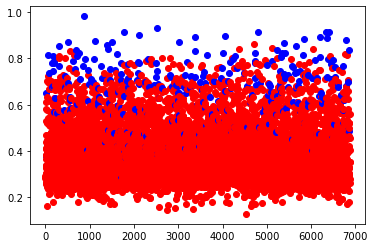

In [23]:
for i in range(len(dice_coefficient)):
    if dice_coefficient[i] in inequal_dice:
        plt.scatter(i,dice_coefficient[i],color='r')
    else:
        plt.scatter(i,dice_coefficient[i],color='b')

In [24]:
# use equal weight in each coefficient
coefficient=[]
for i in range(len(mark)):
    coefficient.append(overlap_coefficient[i]/3+jaccard_coefficient[i]/3+dice_coefficient[i]/3)

In [ ]:
for i in range(len(coefficient)):
    if mark[i]==1:
        plt.scatter(i,coefficient[i],color='r')
    else:
        plt.scatter(i,coefficient[i],color='b')
# same as overlap coefficient

In [ ]:
amazon_test = pd.read_csv("amazonGoogle_test.tsv", sep="\t")

In [ ]:
amazon_test

In [ ]:
question1_test=amazon_test['text_left']
question2_test=amazon_test['text_right']
mark_test=amazon_test['label']

In [ ]:
#calculate the overlap coefficient
coefficient_test=[]
for i in range(len(question1_test)):
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [ ]:
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [ ]:
def calculate_is_duplicate(coefficient):
    mark=[]
    for i in range(len(coefficient)):
        if coefficient[i] >= 0.38:
            mark.append(1)
        else:
            mark.append(0)
    return mark

In [ ]:
mark_calculate=calculate_is_duplicate(coefficient_test)

In [ ]:
def acc(mark_real,mark_test):
    sum = 0
    for i in range(len(mark_real)):
        if mark_real[i]==mark_test[i]:
            sum=sum+1
        else:
            continue
    return sum/len(mark_test)

In [ ]:
acc(mark_test,mark_calculate)